#Libraries:


1.   skimage.io
2.   matplotlib.pyplot
3.   exifread
4.   PIL
5.   PIL.ExifTags
6.   numpy
7.   skimage.color
8.   skimage.util
9.   pandas
10.  scipy.ndimage

#Introduction

##Import image

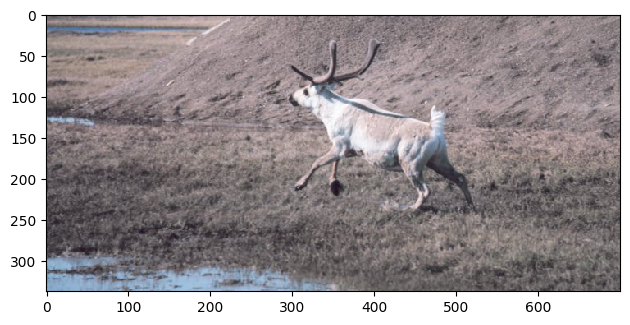

In [ ]:
import skimage.io as io

image=io.imread('/content/anim0614.jpg')

io.imshow(image)
io.show()

##Plot image with color gray

Text(0.5, 1.0, 'image_02')

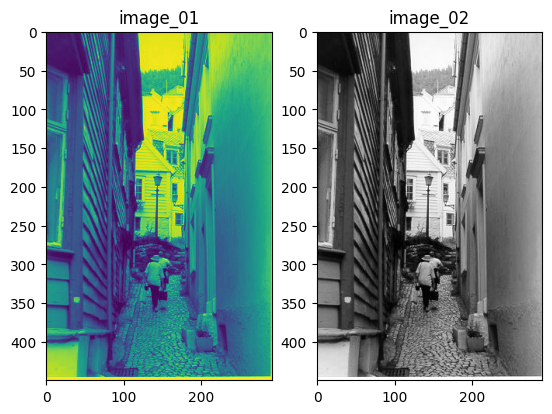

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2)

image=io.imread('/content/bergen.jpg')

axes[0].imshow(image)
axes[0].set_title("image_01")

axes[1].imshow(image, cmap ='gray')
axes[1].set_title("image_02")

##Get dimension

image dimensions (643, 482, 3)


<function skimage.io._io.show()>

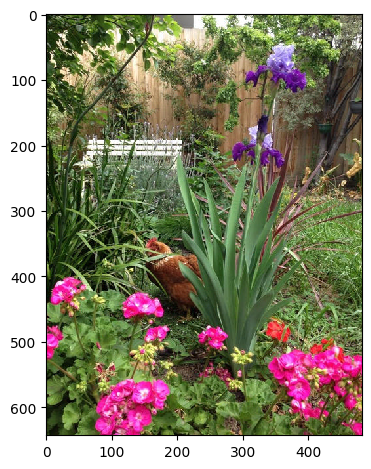

In [ ]:
import skimage.io as io

image=io.imread('/content/backyard.png')


dimensions=image.shape
print('image dimensions',dimensions)

io.imshow(image)
io.show

##Show details of the image

In [ ]:
pip install exifread

In [ ]:
import exifread

file_info=open('/content/galaxy.tif','rb')

In [ ]:
try:
	tags=exifread.process_file(file_info,details=False)
except:
	print('process_file fail')

for x in tags:
	print (x.ljust(32),':',tags[x])

Image ImageWidth                 : 965
Image ImageLength                : 965
Image BitsPerSample              : [8, 8, 8]
Image Compression                : LZW
Image PhotometricInterpretation  : 2
Image StripOffsets               : 8
Image Orientation                : Horizontal (normal)
Image SamplesPerPixel            : 3
Image RowsPerStrip               : 965
Image StripByteCounts            : 276072
Image XResolution                : 1200
Image YResolution                : 1200
Image PlanarConfiguration        : 1
Image ResolutionUnit             : Pixels/Inch


##Acess details

In [ ]:
from PIL import Image
from PIL.ExifTags import TAGS

image = Image.open('/content/backyard.png')

info_dict = {
    "Filename": image.filename,
    "Image Size": image.size,
    "Image Height": image.height,
    "Image Width": image.width,
    "Image Format": image.format,
    "Image Mode": image.mode,
    "Image is Animated": getattr(image, "is_animated", False),
    "Frames in Image": getattr(image, "n_frames", 1)
}



for label,value in info_dict.items():
    print(f"{label:25}: {value}")

Filename                 : /content/backyard.png
Image Size               : (482, 643)
Image Height             : 643
Image Width              : 482
Image Format             : PNG
Image Mode               : RGB
Image is Animated        : False
Frames in Image          : 1


##More details of the image

In [ ]:
from PIL import Image
from PIL.ExifTags import TAGS

image = Image.open('/content/galaxy.tif')

exifdata = image.getexif()

for tag_id in exifdata:
    # tag name em vez de tag id  ilegível para humanos
    tag = TAGS.get(tag_id, tag_id)
    data = exifdata.get(tag_id)
    # decodificar bytes
    if isinstance(data, bytes):
        data = data.decode()
    print(f"{tag:25}: {data}")

ImageWidth               : 965
ImageLength              : 965
BitsPerSample            : (8, 8, 8)
Compression              : 5
PhotometricInterpretation: 2
ResolutionUnit           : 2
StripOffsets             : 8
Orientation              : 1
SamplesPerPixel          : 3
RowsPerStrip             : 965
StripByteCounts          : 276072
XResolution              : 1200.0
YResolution              : 1200.0
PlanarConfiguration      : 1


#Operation

##Toycars

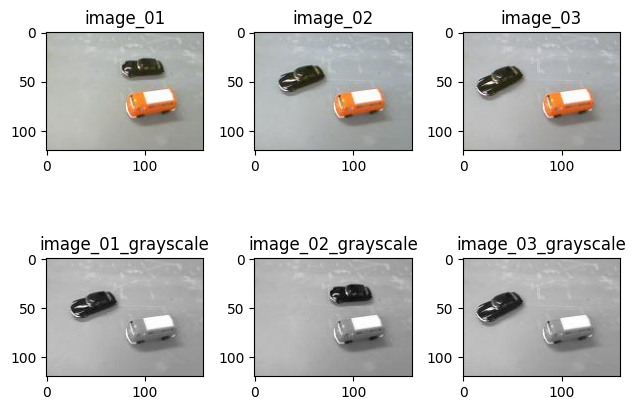

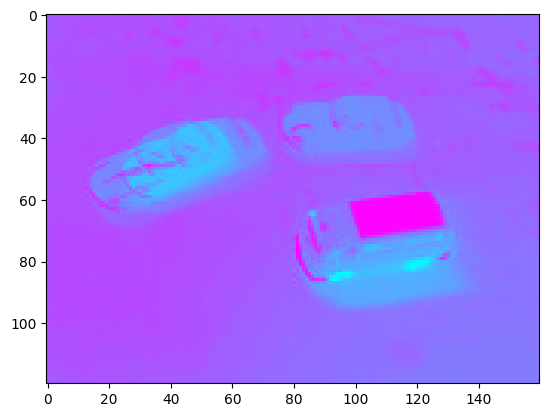

In [ ]:
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np
from skimage.color import rgb2gray
from skimage.util import img_as_ubyte #img_as_ubyte Convert to 8-bit uint.

from numpy import asarray


# Reading image using imread
image_01=io.imread('/content/toycars1.png')
image_02=io.imread('/content/toycars2.png')
image_03=io.imread('/content/toycars3.png')

image_01_grayscale=rgb2gray(image_02)
image_02_grayscale=rgb2gray(image_01)
image_03_grayscale=rgb2gray(image_03)

fig, axes = plt.subplots(2, 3)
#ax = axes.ravel()

axes[0][0].imshow(image_01)
axes[0][0].set_title("image_01")

axes[0][1].imshow(image_02)
axes[0][1].set_title("image_02")

axes[0][2].imshow(image_03)
axes[0][2].set_title("image_03")

axes[1][0].imshow(image_01_grayscale, cmap=plt.cm.gray)
axes[1][0].set_title("image_01_grayscale")

axes[1][1].imshow(image_02_grayscale, cmap=plt.cm.gray)
axes[1][1].set_title("image_02_grayscale")

axes[1][2].imshow(image_03_grayscale, cmap=plt.cm.gray)
axes[1][2].set_title("image_03_grayscale")


fig.tight_layout()
plt.show()


image_01_grayscale=(image_01_grayscale/3)
image_02_grayscale=(image_02_grayscale/3)
image_03_grayscale=(image_03_grayscale/3)


blend = img_as_ubyte(image_01_grayscale + image_02_grayscale+image_03_grayscale)
#plt.imshow(image_01_grayscale/2, cmap='Set3')
plt.imshow(blend, cmap='cool')
plt.show()

##Cat

Text(0.5, 1.0, 'bf')

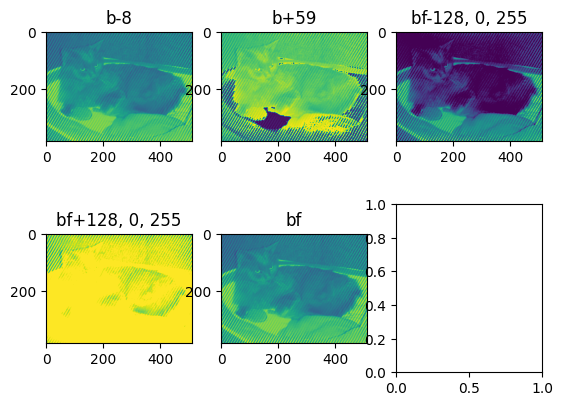

In [ ]:
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np
from skimage.color import rgb2gray
from skimage.util import img_as_ubyte

fig, axes = plt.subplots(2, 3)

b = io.imread('br_cat.png')

axes[0][0].imshow(b-8)
axes[0][0].set_title('b-8')

axes[0][1].imshow(b+59)
axes[0][1].set_title('b+59')

bf = np.float64(b)
b1 = np.uint8(np.clip(bf-128, 0, 255))
b2 = np.uint8(np.clip(bf+128, 0, 255))

axes[0][2].imshow(b1)
axes[0][2].set_title('bf-128, 0, 255')

axes[1][0].imshow(b2)
axes[1][0].set_title('bf+128, 0, 255')

axes[1][1].imshow(bf)
axes[1][1].set_title('bf')

# axes[1][2].imshow(plt.hist(bf.flatten(), bins=256))         #erro
# axes[1][2].set_title('plt.hist(b1.flatten(), bins=256)')

[[136 127 110 ... 187 177 157]
 [132 117  99 ... 181 167 133]
 [126 107  91 ... 180 148 101]
 ...
 [195 156 117 ... 236 221 203]
 [171 129 100 ... 228 211 194]
 [142 106  92 ... 217 199 186]] 


 [[-26. -28. -22. ... -46. -30.  -8.]
 [-32.  -3.   6. ...   3. -29.  60.]
 [-42.   4.   6. ... -15. -34. 112.]
 ...
 [-87.  -3.  20. ... -16.  -3.  37.]
 [-89.  17.  34. ... -10.  -2.  35.]
 [-14.  68.  43. ...  20.  29.  42.]]


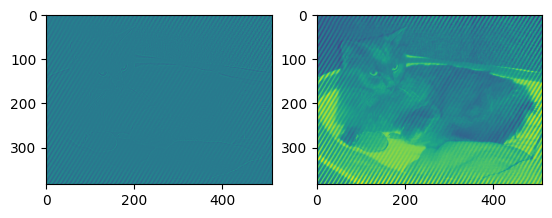

<Figure size 640x480 with 0 Axes>

In [ ]:
import skimage.exposure as ex
import cv2

figure, axes = plt.subplots(1, 2)
img_suavizada = cv2.Laplacian(b, cv2.CV_32F)
print(b, '\n\n\n', img_suavizada)
plt.figure()
axes[0].imshow(img_suavizada)
axes[1].imshow(b)

##Arithmetic operations: multiplication and division

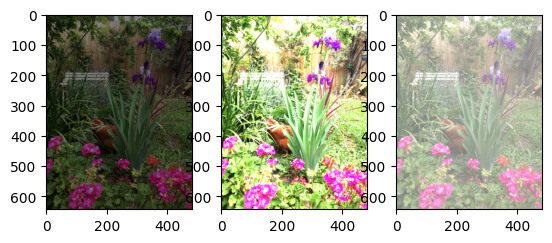

In [ ]:
import numpy as np
import skimage.io as io
b = io.imread('backyard.png')

bf = np.float64(b)
b1 = np.uint8(np.clip(bf/2,0,255))
b2 = np.uint8(np.clip(bf*2,0,255))
b3 = np.uint8(np.clip((bf/2)+128,0,255))

fig, axes = plt.subplots(1,3)

axes[0].imshow(b1)
axes[1].imshow(b2)
axes[2].imshow(b3)

#Filter

##Filter median

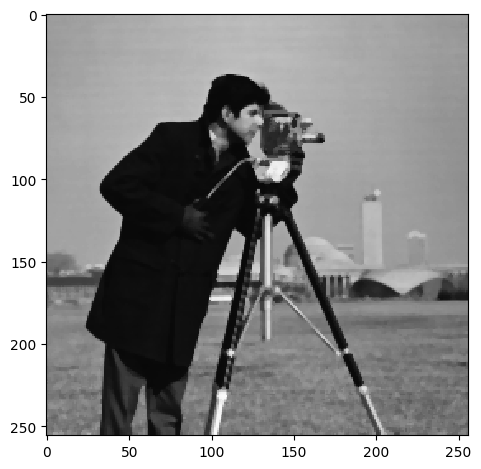

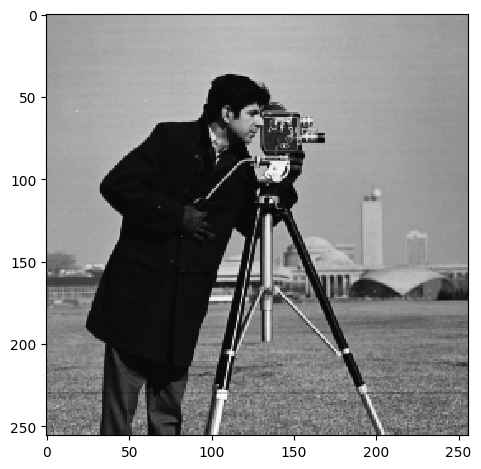

In [ ]:
from skimage.filters import median
import skimage.io as io
c = io.imread('cameraman.png')
f = np.array([[1,4,1],[4,-20,4],[1,4,1]])
cf = median(c, f)
#cf = ndi.filters.median(c)
io.imshow(cf)
figura = plt.figure()

figura.show(io.imshow(c))

##Suavização

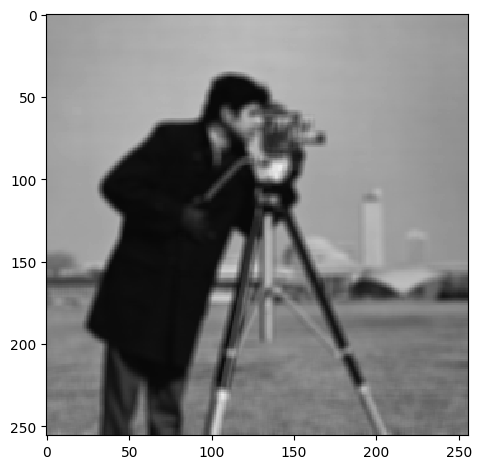

In [ ]:
import scipy.ndimage as ndi
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
x = np.uint8(np.array([
[17,24,1,8,15],
[23,5,7,14,16],
[4,6,13,20,22],
[10,12,19,21,3],
[11,18,25,2,9]])*10)

a = np.ones((3,3))/9

ndi.convolve(x,a,mode='constant')

c = io.imread('cameraman.png')
cf = ndi.convolve(c, np.ones((9,9))/81, mode='constant')
io.imshow(cf)
cfs = ndi.uniform_filter(c, [9,9], mode='constant')
io.imshow(cfs)
cf = ndi.uniform_filter(c,5)
io.imshow(cf)

##Histograma

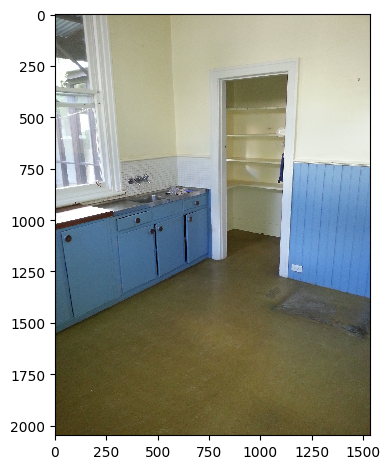

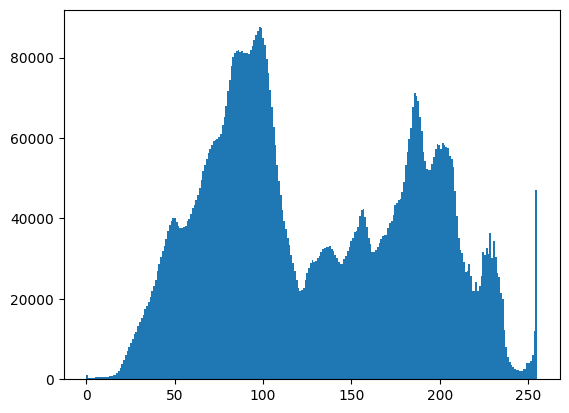

In [ ]:
import skimage.io as io
import numpy as np
import matplotlib.pyplot as plt

s = io.imread('old_room.png')
io.imshow(s)

f = plt.figure()
f.show(plt.hist(s.flatten(),bins=256))

##Laplacian filtering without any extra processing

[[ 33 215 238 ...  35  10   8]
 [190  88   0 ... 234 206 252]
 [ 48 198 232 ...  52  26  16]
 ...
 [186  34   2 ... 244  30 144]
 [  1   4  83 ... 191 203 114]
 [ 30 250 168 ... 142 172 102]]
[[ 33 215 238 ...  35  10   8]
 [190  88   0 ... 234 206 252]
 [ 48 198 232 ...  52  26  16]
 ...
 [186  34   2 ... 244  30 144]
 [  1   4  83 ... 191 203 114]
 [ 30 250 168 ... 142 172 102]]


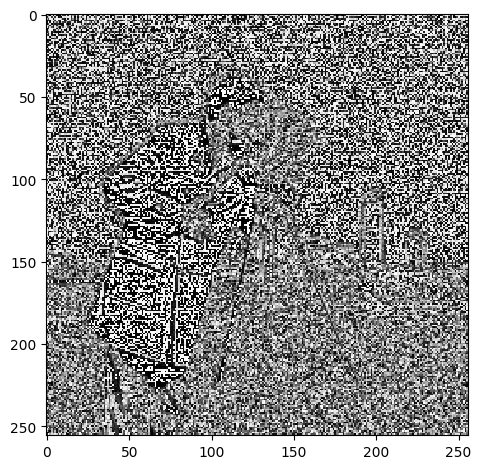

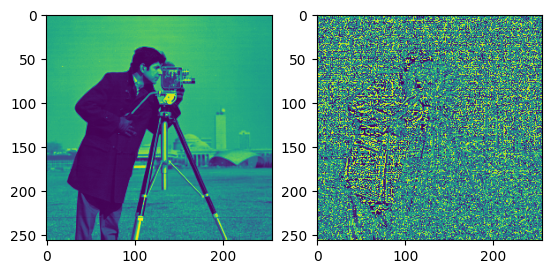

In [ ]:
import scipy.ndimage as ndi
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io

c = io.imread('cameraman.png')
f = np.array([[1,4,1],[4,-20,4],[1,4,1]])
cf = ndi.convolve(c,f)
io.imshow(cf)
print(cf)

fig, axes = plt.subplots(1,2)
axes[0].imshow(c)
axes[1].imshow(cf)        #pq colorida?

print(cf)

##Equalization

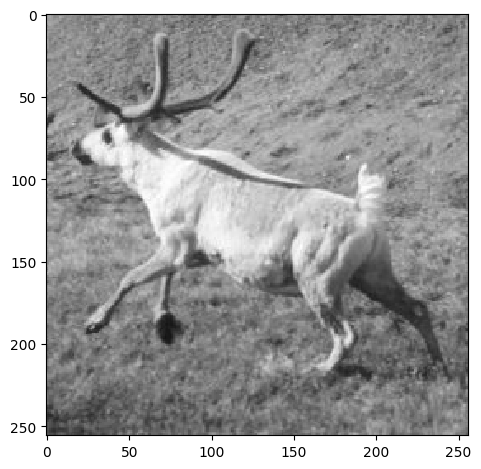

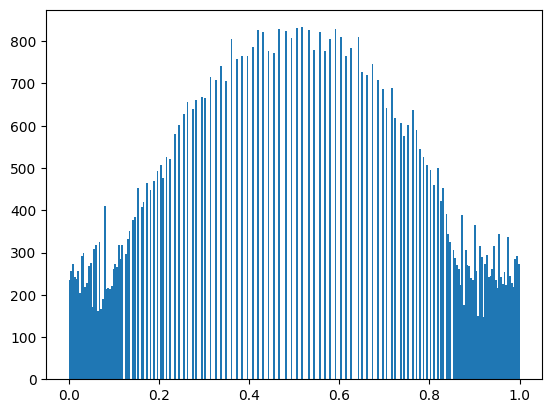

In [ ]:
from skimage import exposure as ex
import skimage.io as io
import numpy as np
import matplotlib.pyplot as plt

c = io.imread('caribou.jpg')
sh = ex.equalize_hist(c)

io.imshow(c)

f = plt.figure()

f.show(plt.hist(sh.flatten(),bins=256))